In [29]:
%pip install tensorflow opencv-python matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow as tf
import os

In [3]:
os.path.join("data","happy")

'data/happy'

In [31]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

1

In [5]:
# Avoid OOM Errors By Setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Remove dodgy images

In [32]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [33]:
data_dir = "data"

In [34]:
os.listdir(os.path.join(data_dir,"happy"))

['images26.jpg',
 'images241.jpg',
 'images32.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f._RI_TTW_.png',
 '05-12-21-happy-people.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 'image22.jpeg',
 'Happy.jpg',
 'images137.jpg',
 'Overtly-Cheerful-Primer-Editorials-min.png',
 'how-happy-are-healthy-people.jpg',
 '170404-happy-workers-feature.jpg',
 'images27.jpg',
 'friends-happy-190821.jpg',
 'images242.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'images134.jpg',
 'images120.jpg',
 'GettyImages-454356720.jpg',
 'WorldHappinessReport_620.jpg',
 '_86a43964-aa8e-11e8-82d1-388e3d6e11aa.jpg',
 'images243.jpg',
 'images30.jpg',
 'png-transparent-graphy-happy-people-love-child-photography-thumbnail.png',
 'young-and-happy-people-vector-15114154.jpg',
 'images247.jpg',
 'file-20230208-27-3jttof.jpg',
 'images125.jpg',
 'friends_190412.jpg',
 'images21.jpg',
 'images246.jpg',
 'happy-people-jump-with-raised-arms-characters-win_107791-

In [35]:
image_exts = ["jpg", "jpeg", "png", "bmp"]

In [36]:
image_exts[0]

'jpg'

In [38]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

images26.jpg
images241.jpg
images32.jpg
89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f._RI_TTW_.png
05-12-21-happy-people.jpg
110754-utyeqqosky-1547658396.jpeg
image22.jpeg
Happy.jpg
images137.jpg
Overtly-Cheerful-Primer-Editorials-min.png
how-happy-are-healthy-people.jpg
170404-happy-workers-feature.jpg
images27.jpg
friends-happy-190821.jpg
images242.jpg
goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
images134.jpg
images120.jpg
GettyImages-454356720.jpg
WorldHappinessReport_620.jpg
_86a43964-aa8e-11e8-82d1-388e3d6e11aa.jpg
images243.jpg
images30.jpg
png-transparent-graphy-happy-people-love-child-photography-thumbnail.png
young-and-happy-people-vector-15114154.jpg
images247.jpg
file-20230208-27-3jttof.jpg
images125.jpg
friends_190412.jpg
images21.jpg
images246.jpg
happy-people-jump-with-raised-arms-characters-win_107791-14884.jpg
images250.jpg
images23.jpg
happy-peaceful.jpg
images132.jpg
MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_FMjpg

In [39]:
img = cv2.imread(os.path.join(data_dir, "happy", "_86a43964-aa8e-11e8-82d1-388e3d6e11aa.jpg"))

In [40]:
img.shape

(540, 960, 3)

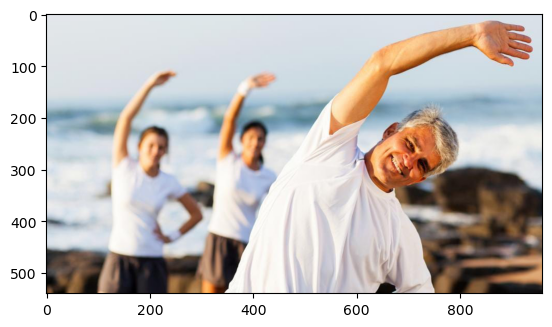

In [41]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}" .format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image at {}" .format(image_path))
            # os.remove(image_path)


libpng warning: iCCP: known incorrect sRGB profile


Image not in ext list data/sad/.DS_Store
Image not in ext list data/sad/depositphotos_41329389-stock-photo-sad-girl-on-the-windowsill.jpg
Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg
Image not in ext list data/sad/sad-serious-illness-womandepressed-emotion-260nw-1810793920.jpg
Image not in ext list data/sad/portrait-sad-man-260nw-126009806.jpg
Image not in ext list data/sad/39843138-sad-man.jpg
Image not in ext list data/sad/sad-person-pictures-1920-x-1270-5jatnx06kaizb3sc.jpg
Image not in ext list data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image not in ext list data/sad/strated-depressed-man-sitting-on-plastic-stool-3d-white-people-man-character.jpg


In [ ]:
tf.data.Dataset.??

In [44]:
import numpy as np
from matplotlib import pyplot as plt

In [84]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 256 files belonging to 2 classes.


In [61]:
data_iterators = data.as_numpy_iterator()

In [73]:
# get another batch from data_iterators
batch = data_iterators.next()

In [63]:
len(batch)

2

In [64]:
# images represent as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [69]:
# class 0 = happy
# class 1 = sad
batch[1]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int32)

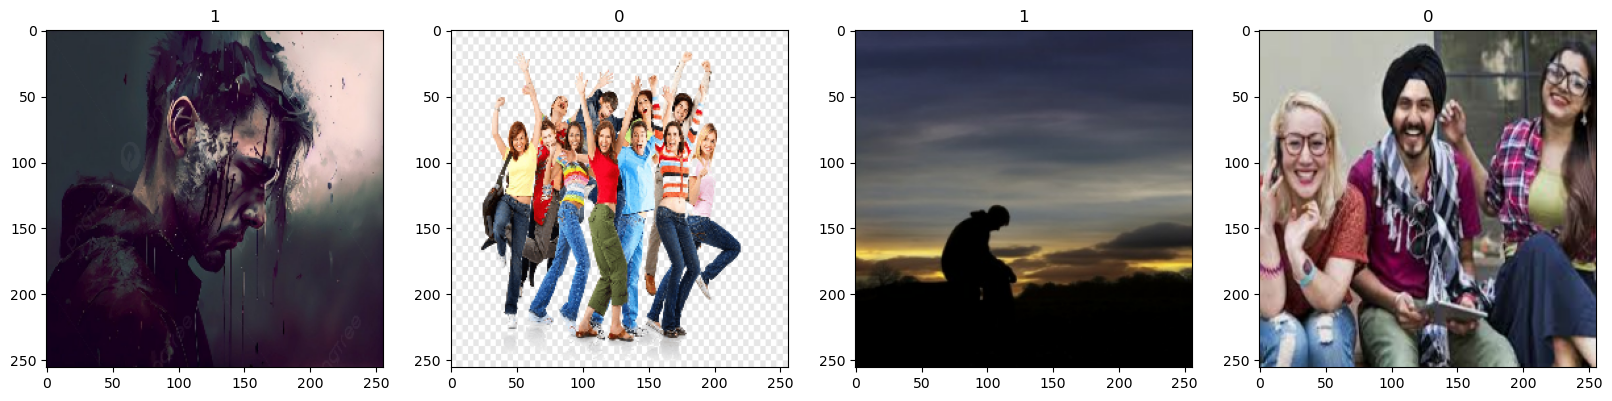

In [66]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [74]:
scaled = batch[0]/255

In [75]:
scaled[0].max()

1.0

# Pre Process Data

## scale data

In [85]:
data = data.map(lambda x, y: (x/255, y))

In [87]:
scaled_iterator = data.as_numpy_iterator()

In [92]:
batch = scaled_iterator.next()

In [93]:
batch[0].max()

1.0

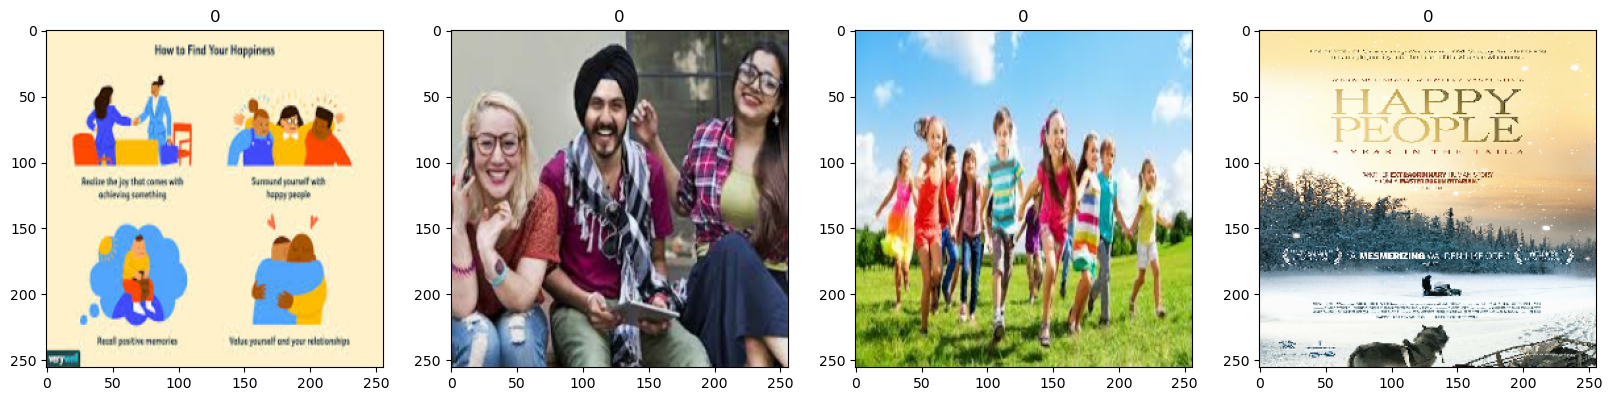

In [94]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [95]:
len(data)

8

In [105]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [106]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [110]:
len(test)

1

# DEEP MODEL
## good stuff

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [112]:
model = Sequential()

In [113]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [114]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [115]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [116]:
log_dir = "logs"

In [117]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [119]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-07-20 17:10:34.967074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.4889 - accuracy: 0.7750

2023-07-20 17:10:38.117093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 5s 524ms/step - loss: 0.4889 - accuracy: 0.7750 - val_loss: 0.4424 - val_accuracy: 0.7969
Epoch 2/20


2023-07-20 17:10:39.638033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.4262 - accuracy: 0.8313

2023-07-20 17:10:41.727498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 505ms/step - loss: 0.4262 - accuracy: 0.8313 - val_loss: 0.3926 - val_accuracy: 0.8125
Epoch 3/20


2023-07-20 17:10:43.240873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.3965 - accuracy: 0.8188

2023-07-20 17:10:45.158957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 475ms/step - loss: 0.3965 - accuracy: 0.8188 - val_loss: 0.3264 - val_accuracy: 0.8438
Epoch 4/20


2023-07-20 17:10:46.640364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.3529 - accuracy: 0.8375

2023-07-20 17:10:48.636663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 511ms/step - loss: 0.3529 - accuracy: 0.8375 - val_loss: 0.3572 - val_accuracy: 0.8750
Epoch 5/20


2023-07-20 17:10:50.236272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.3628 - accuracy: 0.8125

2023-07-20 17:10:52.398276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 495ms/step - loss: 0.3628 - accuracy: 0.8125 - val_loss: 0.2598 - val_accuracy: 0.8438
Epoch 6/20


2023-07-20 17:10:53.911006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.2974 - accuracy: 0.8938

2023-07-20 17:10:56.011591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 491ms/step - loss: 0.2974 - accuracy: 0.8938 - val_loss: 0.2969 - val_accuracy: 0.9219
Epoch 7/20


2023-07-20 17:10:57.517580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.2591 - accuracy: 0.8750

2023-07-20 17:10:59.564448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 504ms/step - loss: 0.2591 - accuracy: 0.8750 - val_loss: 0.1370 - val_accuracy: 0.9844
Epoch 8/20


2023-07-20 17:11:01.080869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.1948 - accuracy: 0.9438

2023-07-20 17:11:03.225978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 510ms/step - loss: 0.1948 - accuracy: 0.9438 - val_loss: 0.4012 - val_accuracy: 0.8438
Epoch 9/20


2023-07-20 17:11:04.750473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.3080 - accuracy: 0.8625

2023-07-20 17:11:06.768608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 510ms/step - loss: 0.3080 - accuracy: 0.8625 - val_loss: 0.2178 - val_accuracy: 0.9531
Epoch 10/20


2023-07-20 17:11:08.306437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.2300 - accuracy: 0.8813

2023-07-20 17:11:10.395704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 524ms/step - loss: 0.2300 - accuracy: 0.8813 - val_loss: 0.3196 - val_accuracy: 0.7969
Epoch 11/20


2023-07-20 17:11:11.949082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.1793 - accuracy: 0.9375

2023-07-20 17:11:13.980423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 502ms/step - loss: 0.1793 - accuracy: 0.9375 - val_loss: 0.1753 - val_accuracy: 0.9688
Epoch 12/20


2023-07-20 17:11:15.490867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.1576 - accuracy: 0.9500

2023-07-20 17:11:17.504220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 507ms/step - loss: 0.1576 - accuracy: 0.9500 - val_loss: 0.2195 - val_accuracy: 0.8750
Epoch 13/20


2023-07-20 17:11:19.041726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.1259 - accuracy: 0.9625

2023-07-20 17:11:21.174097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 499ms/step - loss: 0.1259 - accuracy: 0.9625 - val_loss: 0.1329 - val_accuracy: 0.9531
Epoch 14/20


2023-07-20 17:11:22.699740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.1181 - accuracy: 0.9563

2023-07-20 17:11:24.722403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 497ms/step - loss: 0.1181 - accuracy: 0.9563 - val_loss: 0.1176 - val_accuracy: 0.9688
Epoch 15/20


2023-07-20 17:11:26.224474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.9625

2023-07-20 17:11:28.325689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 521ms/step - loss: 0.0881 - accuracy: 0.9625 - val_loss: 0.1008 - val_accuracy: 0.9531
Epoch 16/20


2023-07-20 17:11:29.868982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9688

2023-07-20 17:11:32.035018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 517ms/step - loss: 0.0751 - accuracy: 0.9688 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 17/20


2023-07-20 17:11:33.569637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9750

2023-07-20 17:11:35.554743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 498ms/step - loss: 0.0567 - accuracy: 0.9750 - val_loss: 0.0553 - val_accuracy: 0.9688
Epoch 18/20


2023-07-20 17:11:37.142310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0565 - accuracy: 0.9688

2023-07-20 17:11:39.272682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 528ms/step - loss: 0.0565 - accuracy: 0.9688 - val_loss: 0.0379 - val_accuracy: 0.9844
Epoch 19/20


2023-07-20 17:11:40.818839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9875

2023-07-20 17:11:42.927776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 507ms/step - loss: 0.0436 - accuracy: 0.9875 - val_loss: 0.0233 - val_accuracy: 1.0000
Epoch 20/20


2023-07-20 17:11:44.460564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 1.0000

2023-07-20 17:11:46.506870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 514ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 1.0000


In [121]:
hist.history

{'loss': [0.48891955614089966,
  0.42618221044540405,
  0.39646250009536743,
  0.35291406512260437,
  0.3627679944038391,
  0.2973537743091583,
  0.25914955139160156,
  0.19477717578411102,
  0.3079727292060852,
  0.2299739122390747,
  0.17928972840309143,
  0.15764157474040985,
  0.12594133615493774,
  0.11812986433506012,
  0.08810918033123016,
  0.07507552206516266,
  0.05671491473913193,
  0.05652432516217232,
  0.043638717383146286,
  0.019375137984752655],
 'accuracy': [0.7749999761581421,
  0.831250011920929,
  0.8187500238418579,
  0.8374999761581421,
  0.8125,
  0.893750011920929,
  0.875,
  0.9437500238418579,
  0.862500011920929,
  0.8812500238418579,
  0.9375,
  0.949999988079071,
  0.9624999761581421,
  0.956250011920929,
  0.9624999761581421,
  0.96875,
  0.9750000238418579,
  0.96875,
  0.987500011920929,
  1.0],
 'val_loss': [0.4423597455024719,
  0.3925760090351105,
  0.32641565799713135,
  0.35717278718948364,
  0.2597724497318268,
  0.29693150520324707,
  0.137033894

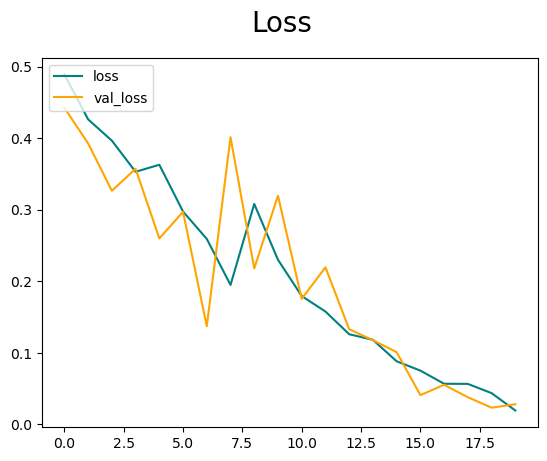

In [124]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

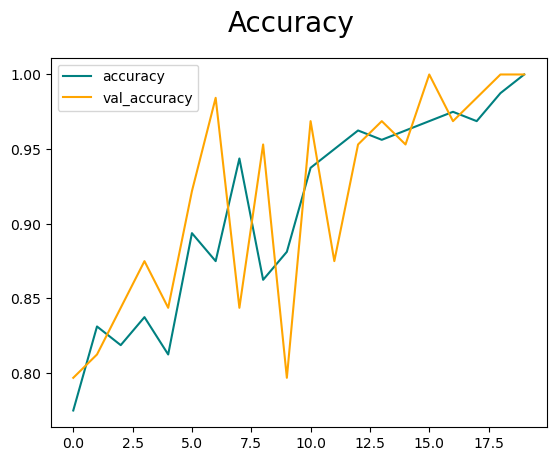

In [125]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [126]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [127]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [128]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-07-20 17:24:53.826827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 305ms/step


2023-07-20 17:24:54.736756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [129]:
print("Precision: {}" .format(pre.result().numpy()))
print("Recall: {}" .format(re.result().numpy()))
print("Accuracy: {}" .format(acc.result().numpy()))

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


## Test

In [ ]:
import cv2

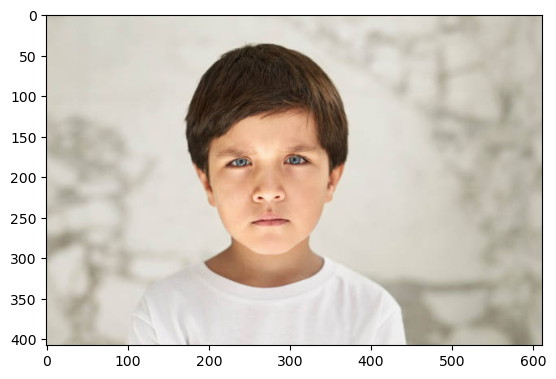

In [175]:
img = cv2.imread("sad_test.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

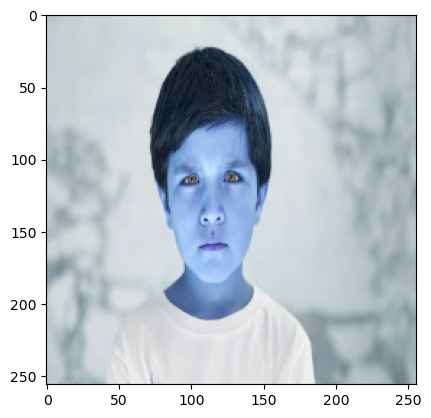

In [176]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [177]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [178]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 16ms/step


array([[0.93335557]], dtype=float32)

In [179]:
if yhat < .5:
    print("Happy")
else:
    print("Sad")

Sad


In [182]:
from tensorflow.keras.models import load_model
model.save(os.path.join("models","happysadmodel.h5"))

/Users/yashgupta/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [183]:
new_model = load_model(os.path.join("models","happysadmodel.h5"))


In [186]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 199ms/step


2023-07-20 17:54:43.904959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [187]:
if yhat_new < .5:
    print("Happy")
else:
    print("Sad")

Sad
